In [63]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [64]:
gdf_lotes = pd.read_pickle('resultados/gdf_lotes_lidar.pkl')

In [65]:
gdf_lotes.columns

Index(['sqlc', 'sq', 'agregado', 'ano', 'Quantidade de Unidades',
       'Quantidade de Unidades Condominiais',
       'Tamanho Médio da Unidade Condominial', 'Tamanho médio dos Terrenos',
       'Área Total dos lotes', 'Área Total Ocupada', 'Área Total Construída',
       'Valor Total dos Terrenos', 'Valor Total das Construções', 'CA médio',
       'TO médio', 'CA médio em lotes condominiais',
       'TO médio em lotes condominiais', 'CA médio em lotes não condominiais',
       'TO médio em lotes não condominiais', 'Comprimento Médio da Testada',
       'Número médio de Pavimentos', 'Fator de obsolecência médio',
       'Residencial vertical Baixo (m2)', 'Residencial vertical Médio (m2)',
       'Residencial vertical Alto (m2)', 'Residencial horizontal Baixo (m2)',
       'Residencial horizontal Médio (m2)', 'Residencial horizontal Alto (m2)',
       'Comercial vertical Baixo (m2)', 'Comercial vertical Médio (m2)',
       'Comercial vertical Alto (m2)', 'Comercial horizontal Baixo (m2

In [66]:
gdf_lotes.loc[:, 'BHM_area_construida'] = gdf_lotes.loc[:, 'BHM_sum'] / 3.4

In [67]:
gdf_lotes.loc[:, 'BHM_pavimentos' ] = np.round(gdf_lotes.loc[:, 'BHM_max'] / 3.4, 0)

In [68]:
gdf_lotes.loc[:, 'BHM_diferenca_area_construida'] = gdf_lotes.loc[:, 'BHM_area_construida'] - gdf_lotes.loc[:, 'Área Total Construída']

In [69]:
gdf_lotes.loc[:, 'BHM_diferenca_area_projetada'] = gdf_lotes.loc[:, 'BHM_count'] - gdf_lotes.loc[:, 'Área Total Ocupada']

In [70]:
gdf_lotes.loc[:, 'BHM_diferenca_de_pavimentos'] = gdf_lotes.loc[:, 'BHM_pavimentos'] - gdf_lotes.loc[:, 'Número médio de Pavimentos']

In [71]:
gdf_lotes.loc[:, 'BHM_CA'] = gdf_lotes.loc[:, 'BHM_area_construida'] / gdf_lotes.loc[:, 'Área Total dos lotes']

In [72]:
gdf_lotes.loc[:, 'BHM_TO'] = gdf_lotes.loc[:, 'BHM_count'] / gdf_lotes.loc[:, 'Área Total dos lotes']

In [73]:
gdf_lotes.loc[:, 'BHM_diferenca_CA'] = gdf_lotes.loc[:, 'BHM_CA'] - gdf_lotes.loc[:, 'CA médio']

In [74]:
gdf_lotes.loc[:, 'BHM_diferenca_TO'] = gdf_lotes.loc[:, 'BHM_TO'] - gdf_lotes.loc[:, 'TO médio']

In [75]:
gdf_lotes.to_pickle('resultados/gdf_lotes_lidar_2.pkl')

In [76]:
# Dimensões do modelo

dimensoes = [
    'Área Total dos lotes',
    'Área Total Construída',
    'BHM_area_construida',
    'Número médio de Pavimentos',
    'BHM_pavimentos',
    'Área Total Ocupada',
    'BHM_count',
    'CA médio',
    'BHM_CA',
    'TO médio',
    'BHM_TO'
    # 'BHM_diferenca_area_construida',
    # 'BHM_diferenca_area_projetada',
    # 'BHM_diferenca_de_pavimentos',
    # 'BHM_diferenca_CA',
    # 'BHM_diferenca_TO'
]

In [77]:
gdf_lotes = gdf_lotes[~np.isinf(gdf_lotes.loc[:, 'BHM_diferenca_TO'].to_numpy())].reset_index()

In [78]:
gdf_lotes.loc[:, dimensoes]

,Área Total dos lotes,Área Total Construída,BHM_area_construida,Número médio de Pavimentos,BHM_pavimentos,Área Total Ocupada,BHM_count,CA médio,BHM_CA,TO médio,BHM_TO
0,230.0,195,318.789709,2.000000,2.0,125.0,179,0.847826,1.386042,0.543478,0.778261
1,230.0,268,435.414465,1.000000,3.0,205.0,196,1.165217,1.893106,0.891304,0.852174
2,90.0,145,168.437464,2.000000,3.0,72.0,83,1.611111,1.871527,0.800000,0.922222
3,195.0,160,306.651970,1.000000,4.0,120.0,189,0.820513,1.572574,0.615385,0.969231
4,130.0,137,298.055725,3.000000,3.0,50.0,134,1.053846,2.292736,0.384615,1.030769
...,...,...,...,...,...,...,...,...,...,...,...
1635663,776.0,569,1645.363195,1.666667,3.0,359.0,789,0.999326,2.120313,0.606469,1.016753
1635664,5694.0,150,2611.778062,0.250000,2.0,150.0,1907,0.105932,0.458690,0.105932,0.334914
1635665,3706.0,3325,4581.779642,2.000000,4.0,2983.0,2285,0.898459,1.236314,0.791214,0.616568
1635666,12195.0,4493,8478.316866,1.500000,4.0,3377.0,4374,0.391138,0.695229,0.337777,0.358672


In [79]:
gdf_lotes.loc[:, dimensoes].dtypes

Área Total dos lotes          float64
Área Total Construída           int64
BHM_area_construida           float64
Número médio de Pavimentos    float64
BHM_pavimentos                float64
Área Total Ocupada            float64
BHM_count                       int64
CA médio                      float64
BHM_CA                        float64
TO médio                      float64
BHM_TO                        float64
dtype: object

In [80]:
gdf_lotes.loc[:, dimensoes]

,Área Total dos lotes,Área Total Construída,BHM_area_construida,Número médio de Pavimentos,BHM_pavimentos,Área Total Ocupada,BHM_count,CA médio,BHM_CA,TO médio,BHM_TO
0,230.0,195,318.789709,2.000000,2.0,125.0,179,0.847826,1.386042,0.543478,0.778261
1,230.0,268,435.414465,1.000000,3.0,205.0,196,1.165217,1.893106,0.891304,0.852174
2,90.0,145,168.437464,2.000000,3.0,72.0,83,1.611111,1.871527,0.800000,0.922222
3,195.0,160,306.651970,1.000000,4.0,120.0,189,0.820513,1.572574,0.615385,0.969231
4,130.0,137,298.055725,3.000000,3.0,50.0,134,1.053846,2.292736,0.384615,1.030769
...,...,...,...,...,...,...,...,...,...,...,...
1635663,776.0,569,1645.363195,1.666667,3.0,359.0,789,0.999326,2.120313,0.606469,1.016753
1635664,5694.0,150,2611.778062,0.250000,2.0,150.0,1907,0.105932,0.458690,0.105932,0.334914
1635665,3706.0,3325,4581.779642,2.000000,4.0,2983.0,2285,0.898459,1.236314,0.791214,0.616568
1635666,12195.0,4493,8478.316866,1.500000,4.0,3377.0,4374,0.391138,0.695229,0.337777,0.358672


In [81]:
X = gdf_lotes.loc[:, dimensoes].dropna().to_numpy()

In [82]:
gdf_lotes

,index,sqlc,sq,agregado,ano,Quantidade de Unidades,Quantidade de Unidades Condominiais,Tamanho Médio da Unidade Condominial,Tamanho médio dos Terrenos,Área Total dos lotes,...,BHM_sum,BHM_area_construida,BHM_pavimentos,BHM_diferenca_area_construida,BHM_diferenca_area_projetada,BHM_diferenca_de_pavimentos,BHM_CA,BHM_TO,BHM_diferenca_CA,BHM_diferenca_TO
0,0,077354003100,077354,False,2020.0,1,0,NaN,230.000000,230.0,...,1083.885010,318.789709,2.0,123.789709,54.0,0.000000,1.386042,0.778261,0.538216,0.234783
1,1,077354003200,077354,False,2020.0,1,0,NaN,230.000000,230.0,...,1480.409180,435.414465,3.0,167.414465,-9.0,2.000000,1.893106,0.852174,0.727889,-0.039130
2,2,078443011400,078443,False,2020.0,1,0,NaN,90.000000,90.0,...,572.687378,168.437464,3.0,23.437464,11.0,1.000000,1.871527,0.922222,0.260416,0.122222
3,3,078187001300,078187,False,2020.0,1,0,NaN,195.000000,195.0,...,1042.616699,306.651970,4.0,146.651970,69.0,3.000000,1.572574,0.969231,0.752061,0.353846
4,4,078176002100,078176,False,2020.0,1,0,NaN,130.000000,130.0,...,1013.389465,298.055725,3.0,161.055725,84.0,0.000000,2.292736,1.030769,1.238890,0.646154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635663,1635664,144204000000,144204,True,NaN,3,0,NaN,258.666667,776.0,...,5594.234863,1645.363195,3.0,1076.363195,430.0,1.333333,2.120313,1.016753,1.120987,0.410284
1635664,1635665,144205000000,144205,True,NaN,4,0,NaN,1423.500000,5694.0,...,8880.045410,2611.778062,2.0,2461.778062,1757.0,1.750000,0.458690,0.334914,0.352757,0.228982
1635665,1635666,144209000000,144209,True,NaN,2,0,NaN,1853.000000,3706.0,...,15578.050781,4581.779642,4.0,1256.779642,-698.0,2.000000,1.236314,0.616568,0.337855,-0.174646
1635666,1635667,230092000000,230092,True,NaN,2,0,NaN,6097.500000,12195.0,...,28826.277344,8478.316866,4.0,3985.316866,997.0,2.500000,0.695229,0.358672,0.304091,0.020895


In [83]:
X.shape

(1635668, 11)

In [84]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [85]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [86]:
X = scaler.transform(X)

In [24]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


/Users/fernandogomes/miniconda3/envs/geo/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fernandogomes/miniconda3/envs/geo/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fernandogomes/miniconda3/envs/geo/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fernandogomes/miniconda3/envs/geo/lib/python3.12/site-packages/sklearn/cluster/_kmeans.

In [25]:
for key, val in mapping1.items():
	print(f'{key} : {val}')


1 : 1.5768393359515493
2 : 1.4644240959876085
3 : 1.4578668791454656
4 : 1.1934642141518945
5 : 1.1860922815415857
6 : 1.1822203418043677
7 : 1.1793147526683863
8 : 1.1742468234240155
9 : 1.071242391095227
10 : 1.0694577953228037
11 : 1.0643093771211198
12 : 1.0504264708025635
13 : 1.047411457515136
14 : 1.006630497445178
15 : 0.9970600932719568
16 : 0.9767853138846738
17 : 0.9939528424483495
18 : 0.974433046109655
19 : 0.9444683541935587


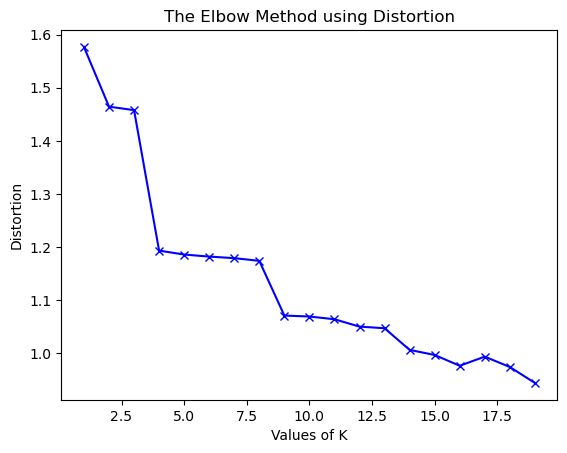

In [26]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


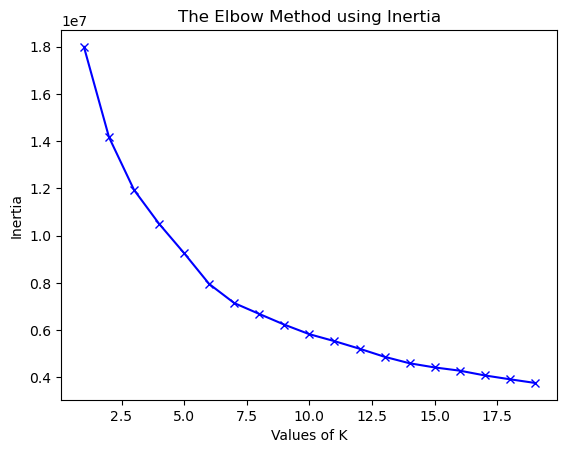

In [27]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [147]:
kmeans = KMeans(n_clusters=9).fit(X)
kmeans.fit(X)

/Users/fernandogomes/miniconda3/envs/geo/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fernandogomes/miniconda3/envs/geo/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9)

In [148]:
gdf_lotes.loc[:, 'label'] = kmeans.labels_

In [149]:
gdf_lotes

,index,sqlc,sq,agregado,ano,Quantidade de Unidades,Quantidade de Unidades Condominiais,Tamanho Médio da Unidade Condominial,Tamanho médio dos Terrenos,Área Total dos lotes,...,BHM_area_construida,BHM_pavimentos,BHM_diferenca_area_construida,BHM_diferenca_area_projetada,BHM_diferenca_de_pavimentos,BHM_CA,BHM_TO,BHM_diferenca_CA,BHM_diferenca_TO,label
0,0,077354003100,077354,False,2020.0,1,0,NaN,230.000000,230.0,...,318.789709,2.0,123.789709,54.0,0.000000,1.386042,0.778261,0.538216,0.234783,0
1,1,077354003200,077354,False,2020.0,1,0,NaN,230.000000,230.0,...,435.414465,3.0,167.414465,-9.0,2.000000,1.893106,0.852174,0.727889,-0.039130,7
2,2,078443011400,078443,False,2020.0,1,0,NaN,90.000000,90.0,...,168.437464,3.0,23.437464,11.0,1.000000,1.871527,0.922222,0.260416,0.122222,7
3,3,078187001300,078187,False,2020.0,1,0,NaN,195.000000,195.0,...,306.651970,4.0,146.651970,69.0,3.000000,1.572574,0.969231,0.752061,0.353846,0
4,4,078176002100,078176,False,2020.0,1,0,NaN,130.000000,130.0,...,298.055725,3.0,161.055725,84.0,0.000000,2.292736,1.030769,1.238890,0.646154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635663,1635664,144204000000,144204,True,NaN,3,0,NaN,258.666667,776.0,...,1645.363195,3.0,1076.363195,430.0,1.333333,2.120313,1.016753,1.120987,0.410284,0
1635664,1635665,144205000000,144205,True,NaN,4,0,NaN,1423.500000,5694.0,...,2611.778062,2.0,2461.778062,1757.0,1.750000,0.458690,0.334914,0.352757,0.228982,1
1635665,1635666,144209000000,144209,True,NaN,2,0,NaN,1853.000000,3706.0,...,4581.779642,4.0,1256.779642,-698.0,2.000000,1.236314,0.616568,0.337855,-0.174646,7
1635666,1635667,230092000000,230092,True,NaN,2,0,NaN,6097.500000,12195.0,...,8478.316866,4.0,3985.316866,997.0,2.500000,0.695229,0.358672,0.304091,0.020895,1


In [150]:
gdf_lotes.label.value_counts()

label
0    817264
7    412303
1    383999
3     20099
8      1744
5       164
4        79
2        15
6         1
Name: count, dtype: int64

In [151]:
gdf_lotes.loc[:, ['label', 'BHM_diferenca_area_construida']].groupby(by='label').agg({'BHM_diferenca_area_construida': ['count', 'sum']})

BHM_diferenca_area_construida              
                              count           sum
label                                            
0                            817264  1.630864e+08
1                            383999  1.401785e+08
2                                15  5.799371e+06
3                             20099 -2.386506e+07
4                                79  2.544010e+06
5                               164  1.324796e+07
6                                 1  1.085294e+06
7                            412303  7.427080e+07
8                              1744  2.276182e+07

In [152]:
gdf_lotes.loc[gdf_lotes.label ==5, dimensoes].describe()

,Área Total dos lotes,Área Total Construída,BHM_area_construida,Número médio de Pavimentos,BHM_pavimentos,Área Total Ocupada,BHM_count,CA médio,BHM_CA,TO médio,BHM_TO
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,2.179820e+05,93567.134146,174347.404121,7.014753,12.884146,33860.042126,49349.250000,1.399636,2.050637,0.362134,0.458946
std,2.967619e+05,81473.294097,93250.474636,9.258065,10.359430,23780.606599,34750.690984,2.012805,2.091772,0.269390,0.593702
min,1.718100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.278650e+04,38717.500000,117601.679113,2.000000,5.750000,19458.500000,24925.500000,0.264841,0.853798,0.123553,0.251909
50%,1.165175e+05,68579.000000,158251.163905,3.000000,9.500000,31950.000000,41001.000000,0.621134,1.420756,0.338318,0.368443
75%,2.075932e+05,137595.250000,218541.977882,7.143929,16.000000,42365.250000,65816.750000,1.485623,2.555606,0.587151,0.578627
max,1.669181e+06,346903.000000,558790.447065,38.948481,47.000000,131703.000000,150636.000000,10.986264,15.595853,1.000000,7.093137


<Axes: >

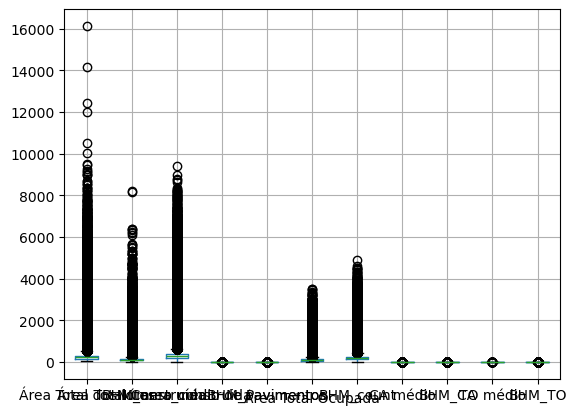

In [135]:
gdf_lotes.loc[gdf_lotes.label ==4, dimensoes].boxplot()

In [109]:
diferenca_area_construida_negativa = (gdf_lotes.BHM_diferenca_area_construida < 0)

In [115]:
gdf_lotes[~diferenca_area_construida_negativa].BHM_diferenca_area_construida.sum()

444962680.0214212

In [120]:
pavimentos = (gdf_lotes.loc[:, 'BHM_pavimentos'] > 0) & (gdf_lotes.loc[:, 'BHM_pavimentos'] < 30)

In [129]:
diferenca_positiva = gdf_lotes.BHM_diferenca_area_construida >= 0

<Axes: >

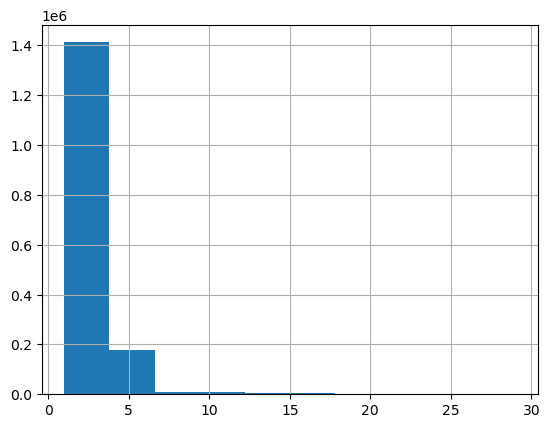

In [123]:
gdf_lotes.loc[pavimentos, 'BHM_pavimentos'].hist()

In [133]:
quantile = gdf_lotes.BHM_diferenca_area_construida.quantile(0.90)
gdf_lotes.loc[(gdf_lotes.BHM_diferenca_area_construida >= quantile) & diferenca_positiva, 'BHM_diferenca_area_construida'].sum()

218588425.09303737

In [132]:
gdf_lotes.loc[:, 'BHM_diferenca_area_construida'].sum()

399109131.8732255